In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from scipy.stats import norm as norm

In [3]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import subplots
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix

In [4]:
#Upload Dataset
df = pd.read_csv('https://raw.githubusercontent.com/b-pinter/Statistical-Modeling-Final/main/pharyngitis.csv')

In [5]:
#Pre-processing and cleaning
#Data Came cleaned (as seen above), and did not need any cleaning due to no nans being present in the dataset.
#Dataset did not need any hot encoding, due to all categorical variables being made into either 1/0.
df.head()

,number,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
0,2000,7.0,0,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2001,11.7,1,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2002,5.6,1,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2003,6.0,1,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2004,5.2,0,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='age_y', ylabel='Count'>

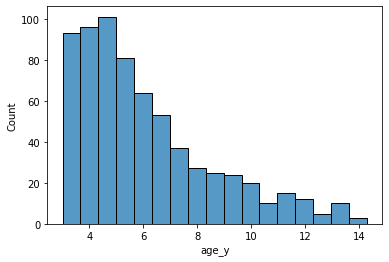

In [6]:
#Visual 1
sns.histplot(data = df, x = 'age_y')

[Text(0.5, 0, 'Temperature, in celcius'),
 Text(0.5, 1.0, 'Temperature of patients')]

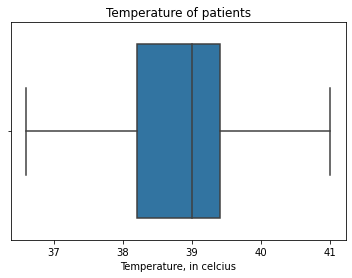

In [7]:
#Visual 2
temp = sns.boxplot(data = df, x = 'temperature')
temp.set(xlabel = 'Temperature, in celcius', title = 'Temperature of patients')

In [8]:
#Prediction 1
#We will be predicting of someone passing/failing a radt test using knn.
#Outcome will be demonstrated on a confusion matrix with a accuracy score.
#Target = radt
#Predictors = All other columns in the dataset, split into training and testing data.

In [9]:
#Confirming no nans present
#(I know that I said the data had no nans present, but who said I couldn't make sure?)
df_noNan = df.dropna()

In [10]:
#X and Y
x = df_noNan.drop(columns = 'radt')
y = df_noNan['radt']

<AxesSubplot:xlabel='count', ylabel='radt'>

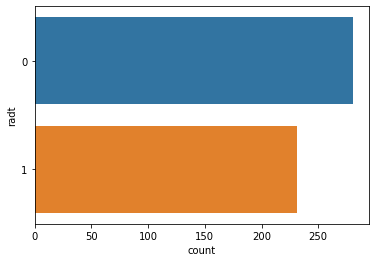

In [11]:
#Visual of what we will be predicting (Target)
sns.countplot(y="radt", data=df_noNan)

In [12]:
#Making training/testing arrays
#Create our model and make predictions!
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size= 0.2,
                                                  shuffle= True, #shuffle the data to avoid bias
                                                  random_state= 42)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [13]:
scaler= Normalizer().fit(x_train) 
normalized_x_train= scaler.transform(x_train)
normalized_x_test= scaler.transform(x_test) 

In [14]:
k = 5 
#initialize model and fit it
knn = KNeighborsClassifier(k)
knn.fit(normalized_x_train, y_train)
#make predictions
y_pred = knn.predict(normalized_x_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Y Prediction')

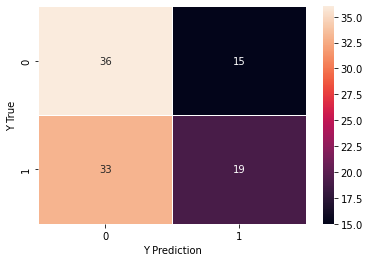

In [16]:
sns.heatmap(cm,annot = True, linewidths= 0.5, fmt=".0f")
plt.ylabel("Y True")
plt.xlabel("Y Prediction")
#Confusion Matrix

In [17]:
#It's just ok, around 53% accuracy
accuracy_score(y_test, y_pred)
#Our model is very good at giving true negative, meaning someone who took the radt test does not have strep throat.
#Our model is very bad a predicting true positive, and often instead gives false negative results to occur.
#I think our model is bad at predicting trust positive due to its large knn value, and it's inability to come to correct answers based off all predictors present.
#This model used all predictors in a attempt to make the best accuracy score, and it turned out to be the best to use all predictors instead of a limited number picked off random choice.

0.5339805825242718

In [18]:
#Prediction 2
#We will be using multiple linear regression to determine age of a patient based on various facors.
#Target = age
#Predictors = Temperature, radt, pain, tolsillarswelling, conjuctivitis, cough, sudden, headache. (I just picked these at random.)
#We will then be using a the lasso to determine which of these predictors is the best at making a good MSE.(Cross Validation)

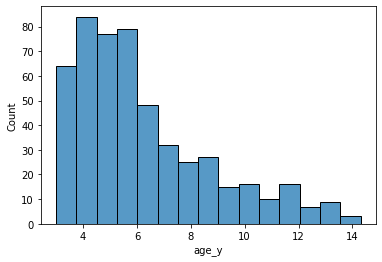

In [19]:
#Histogram showing distribution of age. (Target)
sns.histplot(data=df_noNan, x="age_y")
plt.show()

In [20]:
#Model, multiple linear regression
design = MS(['temperature','radt','pain','tonsillarswelling','conjunctivitis','cough','sudden','headache'])
design = design.fit(df_noNan)
X_1 = design.transform(df_noNan)
y_1 = df_noNan['age_y']
model= sm.OLS(y_1, X_1)
result= model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,25.0184,5.068,4.936,0.000
temperature,-0.5076,0.131,-3.878,0.000
radt,0.0149,0.217,0.068,0.945
pain,1.1619,0.302,3.841,0.000
tonsillarswelling,-0.1327,0.236,-0.563,0.573
conjunctivitis,0.1498,0.685,0.219,0.827
cough,-0.6032,0.223,-2.706,0.007
sudden,-0.0880,0.279,-0.315,0.753
headache,0.9102,0.236,3.858,0.000


In [21]:
#R-Squared Value
print(result.rsquared)
#The poor r-squared value represents that it is hard to predict the age of a patient based on the values used above.
#I attempted to change what predictors where used, like removing cough, sudden, and headache, but it only went to make the r-squared worse.
#R-squared shown below was the best I could create.
#Temperature,Pain, and headache seem to do the best at determining the age of someone. Radt,sudden,and conjunctivitis on the other hand where very poor predictors.
#I think my model is very poor because children of various ages can shown various different symptoms. 
#This therefore makes it almost impossible to predict the age of a patient.

0.09744393950785446


In [22]:
#MSE, using crossed validation to find the best MSE value.
model_sk = sklearn_sm(sm.OLS,
                      MS(X_1.columns))
cv_results = cross_validate(model_sk, X_1, y_1, cv = len(X_1))
cv_results['test_score'].mean()
#It's ok, I guess?

5.923086940417543

In [23]:
#Cross-Validation - Making a better model?
#I will be using the lasso in a attempt to form a better model and better r-squared model.
#I picked this model due to the large amount of predictors I had, since the lasso is very good at demonstrating which are the best.

In [24]:
#Tuning parameter, says alphas but is actually the lambda values for the lasso below.
alphas = 10**np.linspace(10,-2,100)*0.5

In [25]:
#Scale the data, form new training and testing data
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X_1)
X_scale = scaler.transform(X_1)
(X_train,
 X_test,
 Y_train,
 Y_test) = train_test_split(np.asarray(X_scale),
                            y_1,
                            test_size=0.2)

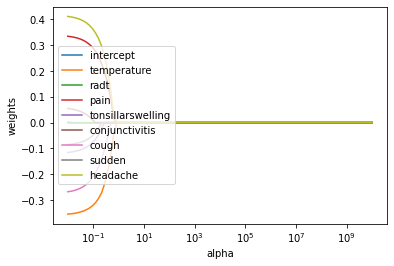

In [28]:
#Run the lasso, give a graphical represenation of the results with the weakest/strongest predictors.
lasso = Lasso(max_iter = 10000)
coefs = []
MSEs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(scale(X_train), Y_train)
  coefs.append(lasso.coef_)
  pred = lasso.predict(X_test)
  MSEs.append(mean_squared_error(Y_test, pred))

ax = plt.gca()
ax.plot(alphas*2, coefs, label = X_1.columns)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend()
#Sorry that the legend is all screwed up, I legit could not find any way to fix it. :C
#From the lasso below, we can tell that the predictors for headache, pain, and temperature seem to have the greatest predicting power for age of a patient.

Text(0, 0.5, 'MSE')

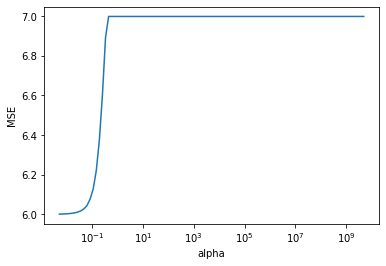

In [33]:
#MSE Plot
plt.plot(alphas, MSEs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')

In [34]:
#New Multiple Linear Regression, using the three strongest predictors from the lasso above.
design = MS(['temperature','pain','headache'])
design = design.fit(df_noNan)
X_2 = design.transform(df_noNan)
y_2 = df_noNan['age_y']
model= sm.OLS(y_2, X_2)
result2= model.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,24.8484,4.942,5.028,0.0
temperature,-0.5132,0.127,-4.052,0.0
pain,1.1630,0.302,3.845,0.0
headache,0.9054,0.235,3.845,0.0


In [31]:
print(result2.rsquared)

0.09717024739152347


In [ ]:
#Helped, but very minimal amount.
#It seems to be that it's very hard to predict the age of a patient based on conditions shown, even with the best predictors present.